### Data Visualizations
- This notebook provides visual exploration of the cleaned PJM Hourly Energy Consumption dataset.    
- We will use various plots and charts to understand trends, patterns, seasonality, and relationships within the data.    
- These visualizations will help uncover insights and guide the development of effective forecasting models.  

Here is the full forms of each features present in the dataset -   
- AEP: American Electric Power  
- COMED: Commonwealth Edison  
- DAYTON: Dayton Power & Light  
- DEOK: Duke Energy Ohio/Kentucky  
- DOM: Dominion Virginia Power  
- DUQ: Duquesne Light Company  
- EKPC: East Kentucky Power Cooperative  
- FE: FirstEnergy  
- NI: Northern Indiana Public Service Company  
- PJME: PJM East Region  
- PJMW: PJM West Region  
- PJM_Load: Total PJM System Load (aggregate of all regions)  

In [3]:
## importing required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## opening the dataset
df_cleaned = pd.read_parquet(r"C:\Users\himan\Desktop\Projects\Energy_Forecasting_System\data\processed-data\est_hourly_cleaned.parquet")

In [5]:
df_cleaned.columns

Index(['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI',
       'PJME', 'PJMW', 'PJM_Load'],
      dtype='object')

In [20]:
df_cleaned.head()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-12-31 01:00:00+00:00,13478.0,9970.0,1596.0,2945.0,9389.0,1458.0,1861.0,6222.0,9810.0,26498.0,5077.0,31569.0
1998-12-31 02:00:00+00:00,13478.0,9970.0,1596.0,2945.0,9389.0,1458.0,1861.0,6222.0,9810.0,26498.0,5077.0,31569.0
1998-12-31 03:00:00+00:00,13478.0,9970.0,1596.0,2945.0,9389.0,1458.0,1861.0,6222.0,9810.0,26498.0,5077.0,31569.0
1998-12-31 04:00:00+00:00,13478.0,9970.0,1596.0,2945.0,9389.0,1458.0,1861.0,6222.0,9810.0,26498.0,5077.0,31569.0
1998-12-31 05:00:00+00:00,13478.0,9970.0,1596.0,2945.0,9389.0,1458.0,1861.0,6222.0,9810.0,26498.0,5077.0,31569.0


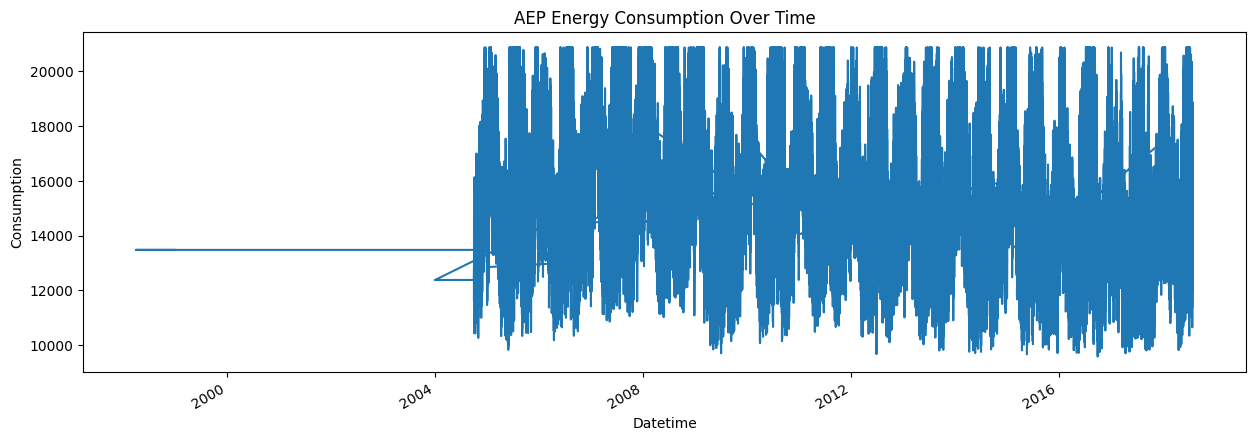

In [9]:
# Plot energy consumption over time for one region
plt.figure(figsize=(15,5))
df_cleaned['AEP'].plot()
plt.title('AEP Energy Consumption Over Time')
plt.xlabel("Datetime")
plt.ylabel("Consumption")
plt.show()

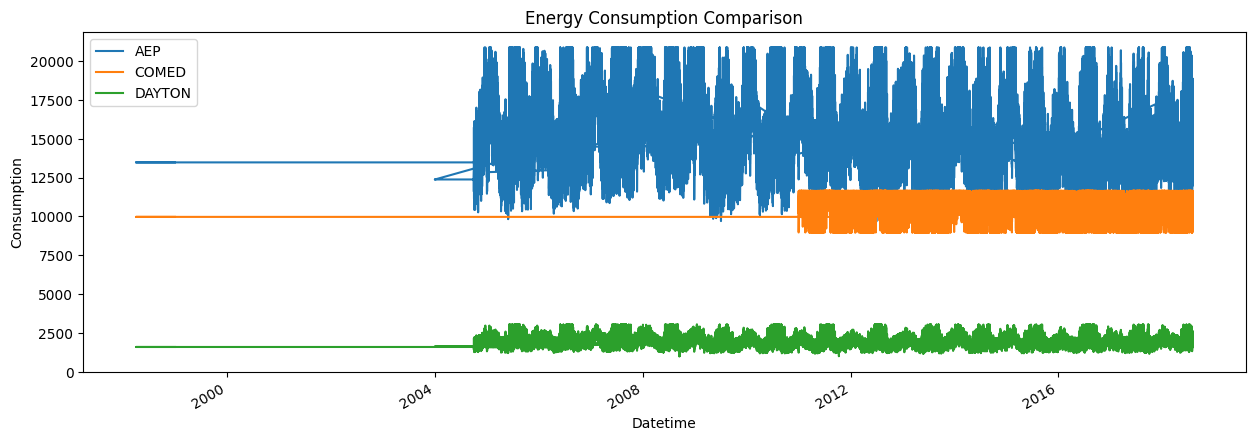

In [10]:
## Plot energy consumption for multiple regions
plt.figure(figsize=(15,5))
for col in ['AEP', 'COMED', 'DAYTON']:
    df_cleaned[col].plot(label=col)
plt.title('Energy Consumption Comparison')
plt.xlabel('Datetime')
plt.ylabel('Consumption')
plt.legend()
plt.show()

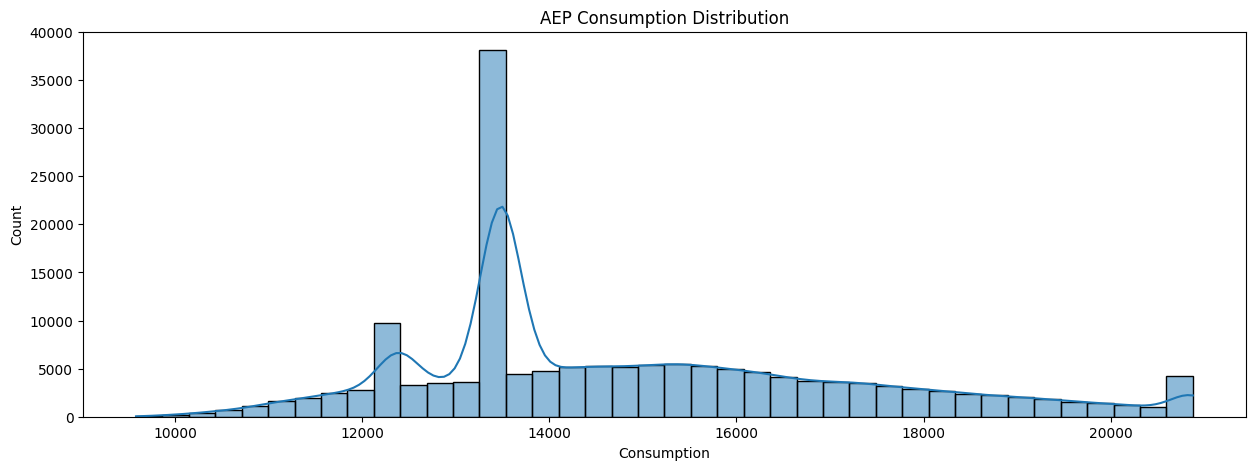

In [14]:
## Plot distribution of AEP consumption
plt.figure(figsize=(15,5))
sns.histplot(df_cleaned['AEP'], bins=40, kde=True)
plt.title('AEP Consumption Distribution')
plt.xlabel('Consumption')
plt.show()

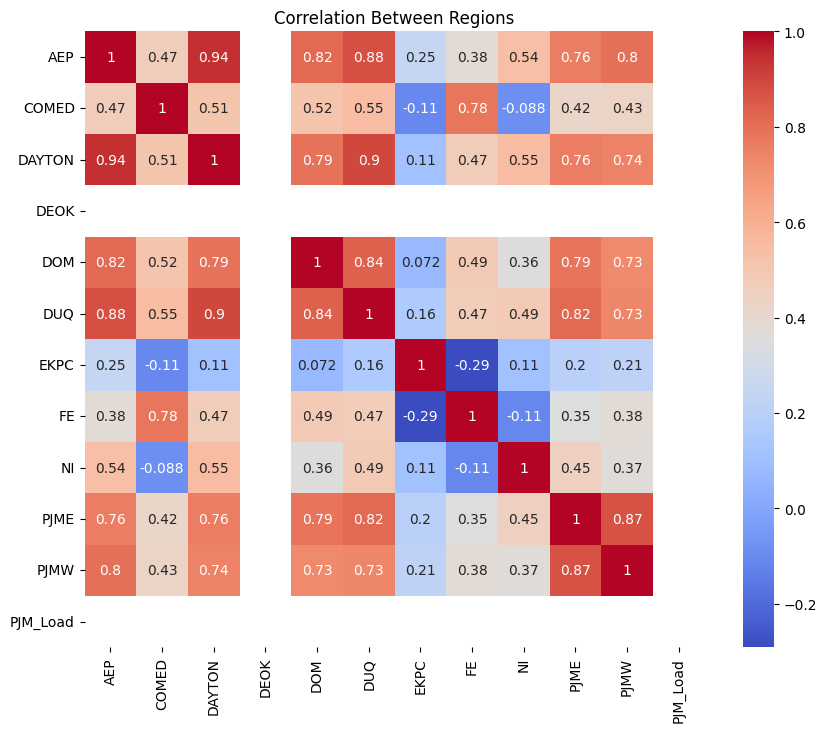

In [18]:
## Checking relationships between regions
plt.figure(figsize=(10,8))
sns.heatmap(df_cleaned.corr(), annot = True, cmap='coolwarm')
plt.title('Correlation Between Regions')
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_6948\155172576.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg  =df_cleaned.resample("M").mean()


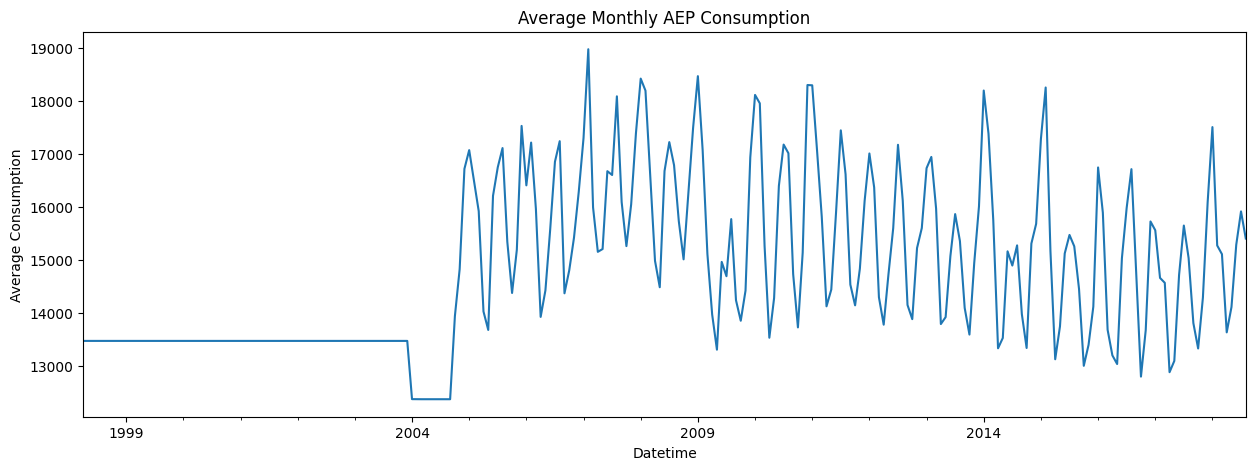

In [21]:
## Average consumption by month
monthly_avg  =df_cleaned.resample("M").mean()
monthly_avg["AEP"].plot(figsize=(15,5))
plt.title('Average Monthly AEP Consumption')
plt.xlabel("Datetime")
plt.ylabel("Average Consumption")
plt.show()

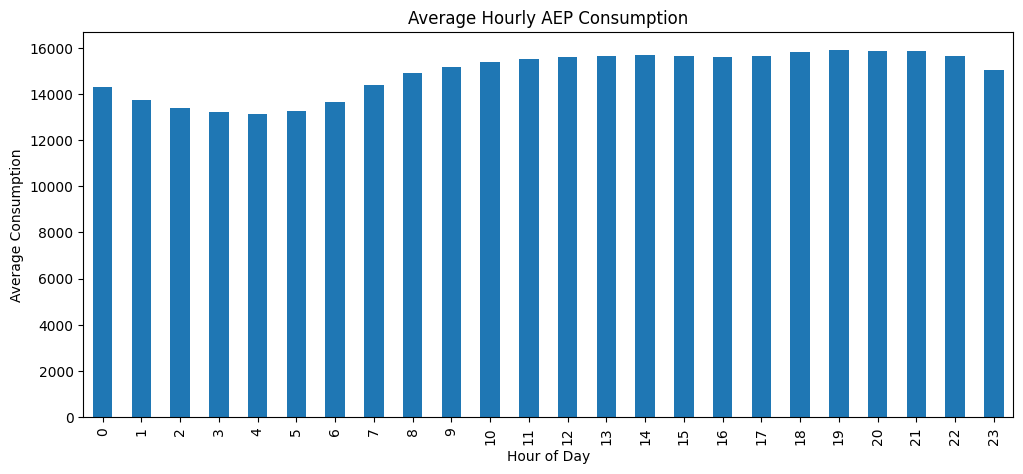

: 

In [ ]:
## Average consumption by hour of the day.
df_cleaned['hour'] = df_cleaned.index.hour
hourly_avg = df_cleaned.groupby('hour').mean()
hourly_avg['AEP'].plot(kind='bar', figsize=(12,5))
plt.title('Average Hourly AEP Consumption')
plt.xlabel('Hour of Day')    
plt.ylabel('Average Consumption')
plt.show()